## Лабораторная работа №1. Предобработка данных.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [7]:
df = pd.read_csv('datasets/archive/heart_failure_clinical_records_dataset.csv')

df = df.drop(columns = ['anaemia','diabetes','high_blood_pressure','sex','smoking','time','DEATH_EVENT'])

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,75.0,582,20,265000.00,1.9,130
1,55.0,7861,38,263358.03,1.1,136
2,65.0,146,20,162000.00,1.3,129
3,50.0,111,20,210000.00,1.9,137
4,65.0,160,20,327000.00,2.7,116


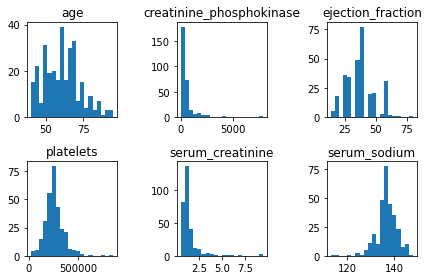

In [3]:
n_bins = 20

fig, axs = plt.subplots(2, 3)

axs[0, 0].hist(df['age'].values, bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(df['creatinine_phosphokinase'].values, bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(df['ejection_fraction'].values, bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(df['platelets'].values, bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(df['serum_creatinine'].values, bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(df['serum_sodium'].values, bins = n_bins)
axs[1, 2].set_title('serum_sodium')
fig.tight_layout()
plt.show()

In [4]:
data = df.to_numpy(dtype='float')

print(data)

[[7.5000000e+01 5.8200000e+02 2.0000000e+01 2.6500000e+05 1.9000000e+00
  1.3000000e+02]
 [5.5000000e+01 7.8610000e+03 3.8000000e+01 2.6335803e+05 1.1000000e+00
  1.3600000e+02]
 [6.5000000e+01 1.4600000e+02 2.0000000e+01 1.6200000e+05 1.3000000e+00
  1.2900000e+02]
 ...
 [4.5000000e+01 2.0600000e+03 6.0000000e+01 7.4200000e+05 8.0000000e-01
  1.3800000e+02]
 [4.5000000e+01 2.4130000e+03 3.8000000e+01 1.4000000e+05 1.4000000e+00
  1.4000000e+02]
 [5.0000000e+01 1.9600000e+02 4.5000000e+01 3.9500000e+05 1.6000000e+00
  1.3600000e+02]]


In [5]:
scaler = preprocessing.StandardScaler().fit(data[:150, :])
data_scaled = scaler.transform(data)

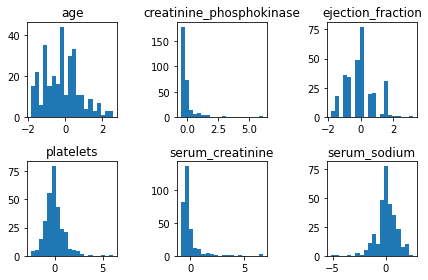

In [6]:
fig, axs = plt.subplots(2,3)

axs[0, 0].hist(data_scaled[:,0], bins = n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(data_scaled[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(data_scaled[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(data_scaled[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(data_scaled[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(data_scaled[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')

fig.tight_layout()
plt.show()